## Visualizing KPIs with better control

### Conversion

- Data from Speedy Lead Performance V2- Charts
- Utilize Python to aggregate the date to a higher level 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [5]:
conv_df = pd.read_excel("/Users/starsrain/2025_concord/loonie_reporting/data/1110_conv_reportV0.xlsx")

In [6]:
conv_df.head()

,Application Date,Conversion Rate
0,2023-11-10,0.120495
1,2023-11-11,0.176015
2,2023-11-12,0.274194
3,2023-11-13,0.159344
4,2023-11-14,0.154192


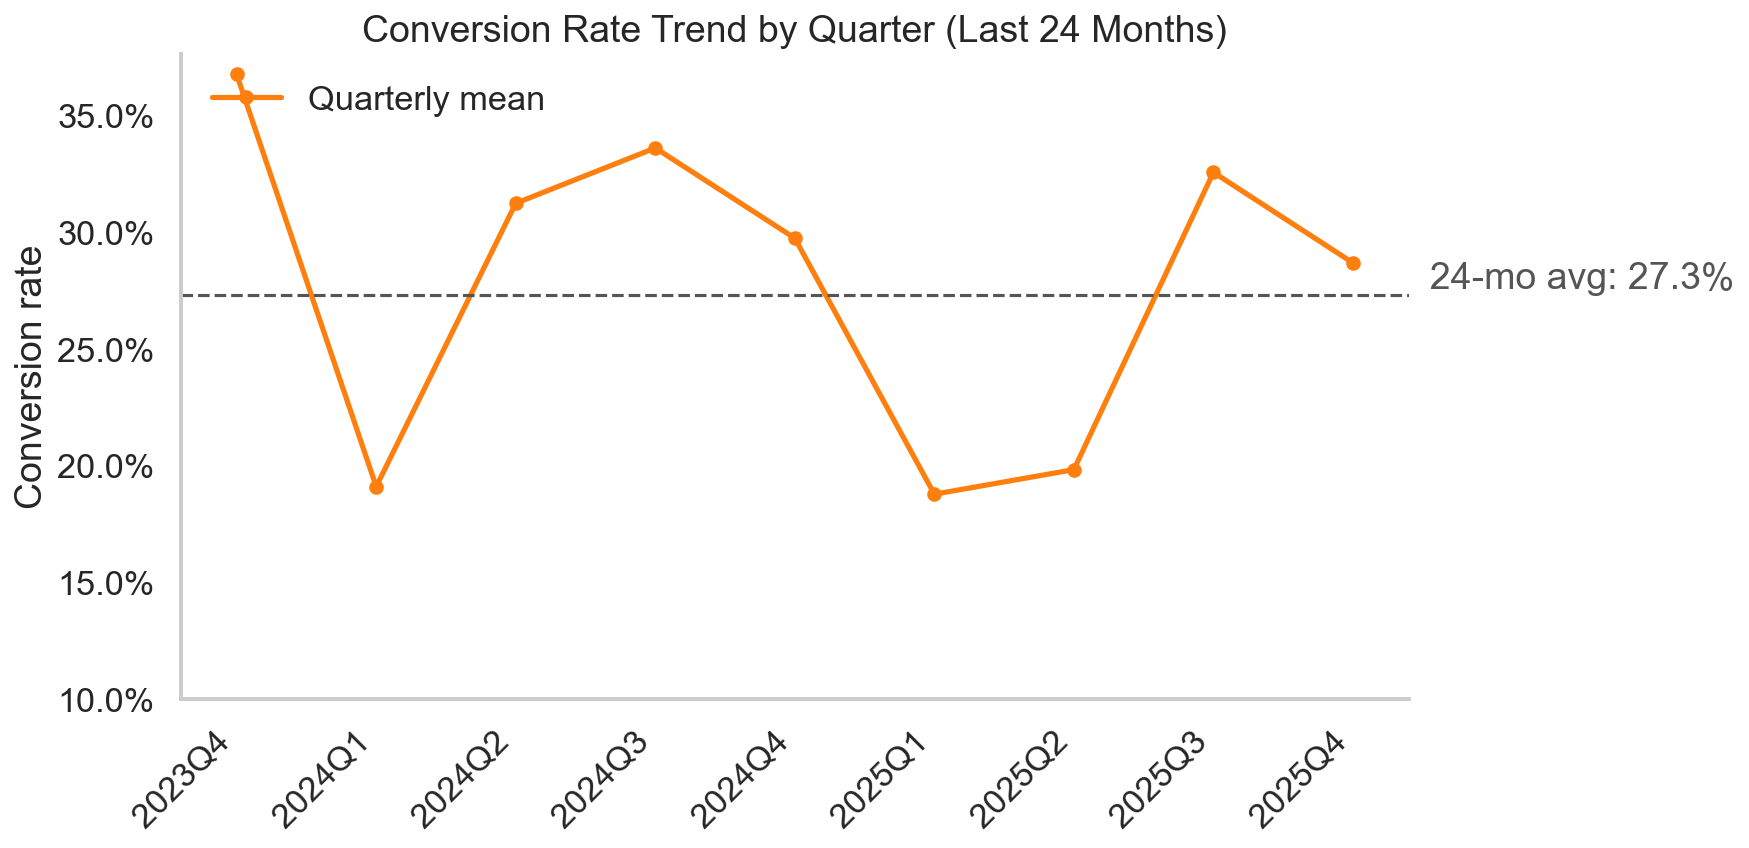

24-month average conversion rate: 27.29%


In [18]:
import matplotlib.dates as mdates
from matplotlib.ticker import PercentFormatter

# Prepare data
_df = conv_df.copy()
_df["Application Date"] = pd.to_datetime(_df["Application Date"])  # ensure datetime
df_sorted = _df.sort_values("Application Date")

# Quarterly mean (quarter start for x-axis) and label
quarterly = (
    df_sorted.set_index("Application Date")["Conversion Rate"]
    .resample("QS").mean()
    .reset_index()
    .dropna(subset=["Conversion Rate"])
)
quarterly["Quarter"] = quarterly["Application Date"].dt.to_period("Q").astype(str)

# Summary metric: average conversion across the entire period
avg_conv = df_sorted["Conversion Rate"].mean()

# Styling
sns.set_theme(style="whitegrid", context="talk")
fig, ax = plt.subplots(figsize=(12, 6), dpi=150)

# Trend line (quarterly)
ax.plot(
    quarterly["Quarter"],
    quarterly["Conversion Rate"],
    color="#ff7f0e",
    linewidth=2.5,
    marker="o",
    markersize=6,
    label="Quarterly mean",
)

# Overall average line and label anchored to right edge
ax.axhline(avg_conv, color="#555555", linestyle="--", linewidth=1.5)
ax.text(
    1.0,
    avg_conv,
    f"  24-mo avg: {avg_conv:.1%}",
    va="bottom",
    ha="left",
    color="#555555",
    transform=ax.get_yaxis_transform(),
)

# Axes formatting
ax.yaxis.set_major_formatter(PercentFormatter(1.0))
ax.set_ylim(bottom=0.10)
#ax.set_xlabel("Quarter")
ax.set_ylabel("Conversion rate")
ax.set_title("Conversion Rate Trend by Quarter (Last 24 Months)")
plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

# Minimal distractions
ax.grid(False)
sns.despine(ax=ax)
ax.legend(frameon=False, loc="upper left")

fig.tight_layout()
plt.show()

print(f"24-month average conversion rate: {avg_conv:.2%}")


### Return Rate

In [10]:
return_df = pd.read_excel("/Users/starsrain/2025_concord/loonie_reporting/data/1110_NACHA_return.xlsx")
return_df.head()

,TransactionDateMonthYear,PaymentModeDescription,Overall Return Rate
0,2021-01-01,ACH,0.081803
1,2021-02-01,ACH,0.111454
2,2021-03-01,ACH,0.116675
3,2021-04-01,ACH,0.137544
4,2021-05-01,ACH,0.146635


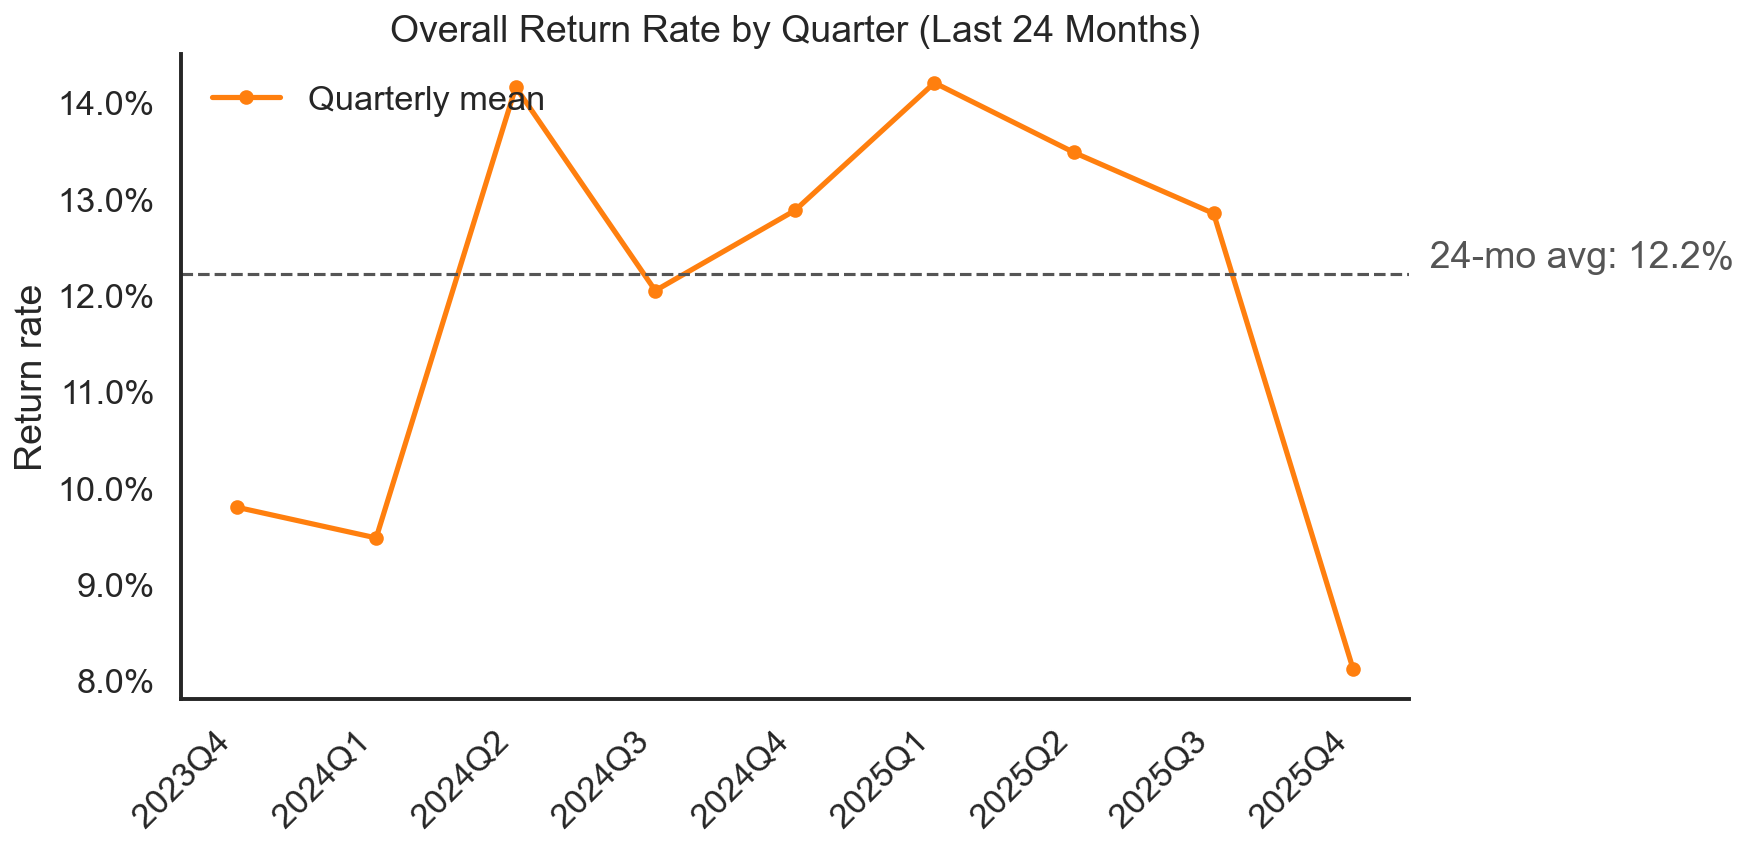

24-month average return rate: 12.22%


In [ ]:
from matplotlib.ticker import PercentFormatter

# Prepare data
_rdf = return_df.copy()
_rdf["TransactionDateMonthYear"] = pd.to_datetime(_rdf["TransactionDateMonthYear"])  # ensure datetime
rdf_sorted = _rdf.sort_values("TransactionDateMonthYear").copy()
rdf_sorted["YearMonth"] = rdf_sorted["TransactionDateMonthYear"].dt.to_period("M")

# Keep last 24 unique months
last_24_months = (
    rdf_sorted["YearMonth"].drop_duplicates().sort_values().tail(24)
)
rdf_24 = rdf_sorted[rdf_sorted["YearMonth"].isin(last_24_months)].copy()

# Quarterly aggregation (mean across any duplicate rows)
quarterly_ret = (
    rdf_24
    .groupby(rdf_24["TransactionDateMonthYear"].dt.to_period("Q"))["Overall Return Rate"]
    .mean()
    .reset_index()
)
quarterly_ret["Quarter"] = quarterly_ret["TransactionDateMonthYear"].astype(str)

# Summary metric: 24-month average return rate
avg_ret = rdf_24["Overall Return Rate"].mean()

# Styling and plot (minimal, no grid)
sns.set_theme(style="white", context="talk")
fig, ax = plt.subplots(figsize=(12, 6), dpi=150)

ax.plot(
    quarterly_ret["Quarter"],
    quarterly_ret["Overall Return Rate"],
    color="#ff7f0e",
    linewidth=2.5,
    marker="o",
    markersize=6,
    label="Quarterly mean",
)

# Overall average line and label anchored to right edge
ax.axhline(avg_ret, color="#555555", linestyle="--", linewidth=1.5)
ax.text(
    1.0,
    avg_ret,
    f"  24-mo avg: {avg_ret:.1%}",
    va="bottom",
    ha="left",
    color="#555555",
    transform=ax.get_yaxis_transform(),
)

# Axes formatting
ax.yaxis.set_major_formatter(PercentFormatter(1.0))
#ax.set_xlabel("Quarter")
ax.set_ylabel("Return rate")
ax.set_title("Overall Return Rate by Quarter (Last 24 Months)")
plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

# Minimal distractions
ax.grid(False)
sns.despine(ax=ax)
ax.legend(frameon=False, loc="upper left")

fig.tight_layout()
plt.show()

print(f"24-month average return rate: {avg_ret:.2%}")
